# Tugas


In [ ]:
# Pasang library jika perlu
!pip install -q scikit-learn pandas matplotlib joblib


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib


In [ ]:

# load dataset dan cek dataset
df = pd.read_csv('/content/drive/MyDrive/insurance (1).csv')
# Tampilkan beberapa baris pertama
print("===== 5 Data Pertama =====")
print(df.head())

# Informasi umum dataset
print("\n===== Informasi Dataset =====")
print(df.info())

# Statistik deskriptif
print("\n===== Statistik Deskriptif =====")
print(df.describe())

===== 5 Data Pertama =====
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

===== Informasi Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

===== Statistik Deskriptif =====

In [ ]:
# Tentukan target dan fitur
target_col = "charges"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identifikasi tipe data
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Kolom numerik :", num_cols)
print("Kolom kategorikal :", cat_cols)


Kolom numerik : ['age', 'bmi', 'children']
Kolom kategorikal : ['sex', 'smoker', 'region']


In [ ]:
# Preprocessing: scaling numerik dan one-hot encoding kategori
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ]
)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Buat pipeline: preprocessing + model Linear Regression
pipe = Pipeline(steps=[
    ("preproc", preprocessor),
    ("lr", LinearRegression())
])

# Latih model
pipe.fit(X_train, y_train)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('lr', LinearRegression())])

In [ ]:
# Prediksi pada data uji
y_pred = pipe.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("===== Hasil Evaluasi Model =====")
print(f"R2  : {r2:.4f}")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")


===== Hasil Evaluasi Model =====
R2  : 0.7836
MSE : 33596915.85
MAE : 4181.19


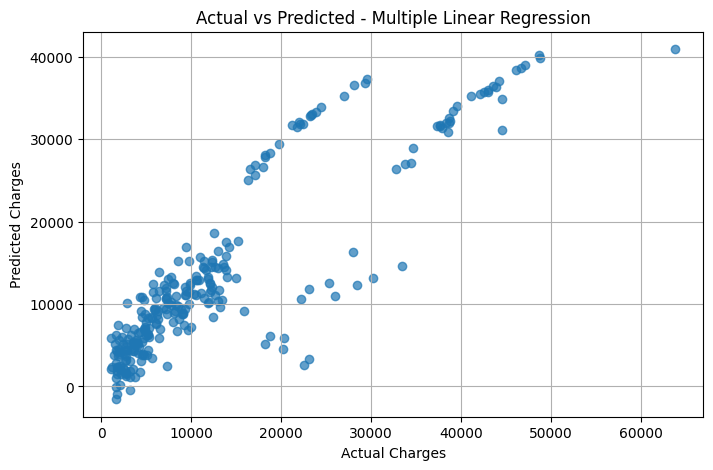

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Multiple Linear Regression")
plt.grid(True)
plt.show()


Kolom utama:

age (int) — umur pasien

sex (object) — jenis kelamin

bmi (float) — body mass index

children (int) — jumlah anak yang ditanggung

smoker (object) — apakah perokok (yes/no)

region (object) — region tempat tinggal

charges (float) — target (biaya medis personal)